In [1]:
%matplotlib inline
%load_ext autoreload
# ! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

# Example: Wavelet

First, lets generate some data and plot it.

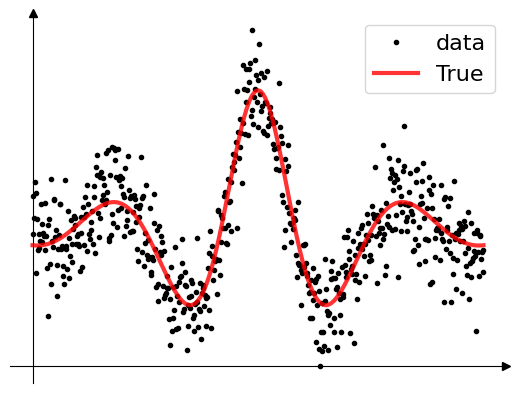

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pspline_psd.sample.spline_model_sampler import fit_data_with_pspline_model
from pspline_psd.plotting import set_plotting_style
from pspline_psd.plotting.plot_spline_model_and_data import plot_spline_model_and_data
from pspline_psd.plotting.utils import convert_axes_spines_to_arrows


def func(x):
    return 1 / (x ** 2 + 1) * np.cos(np.pi * x)


n_obs = 600
np.random.seed(0)

# make example data
x = np.linspace(-3,3,n_obs)
y = func(x) + np.random.normal(0, 0.2, len(x))
# move data to be positive
scaling = np.abs(min(y))
y = y + scaling

# plot example data
set_plotting_style()
fig, ax = plt.subplots()
ax.plot(y, '.k', label='data')
ax.plot(func(x)+scaling, '-r', label='True', lw=3, alpha=0.8, zorder=10)
convert_axes_spines_to_arrows(ax)
ax.set_xticks([])
ax.set_yticks([])
ax.legend();


In [10]:
mcmc_objs = []
n_basis = [5, 10, 15, 30]
for k in n_basis:
    mcmc_ = fit_data_with_pspline_model(
        data=y, Ntotal=500, burnin=100,
        degree=3, eqSpacedKnots=True, 
        compute_psds=True, k=k
    )
    mcmc_objs.append(mcmc_)


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

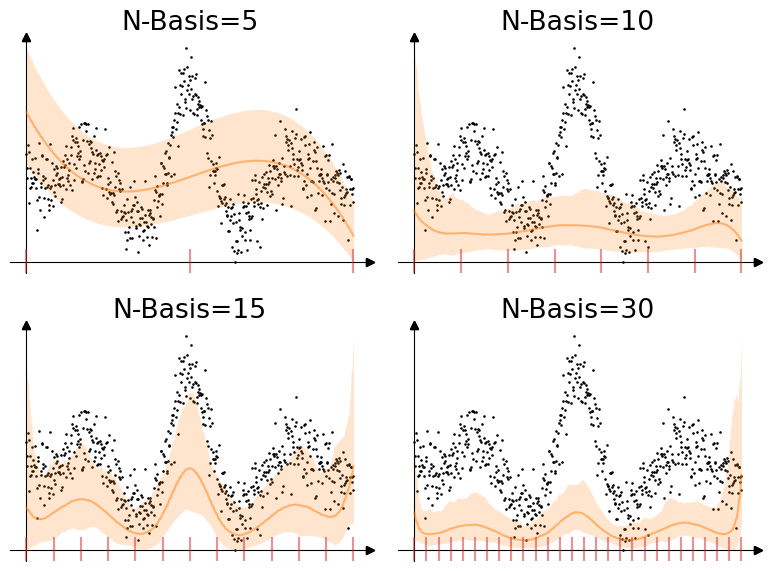

In [17]:
def make_mcmc_plots(mcmc_objs):
    fig, axes = plt.subplots(2,2, figsize=(8,6))
    for i, ax in enumerate(axes.ravel()):
        mc = mcmc_objs[i]
        fig = plot_spline_model_and_data(
            mc.data, mc.psd_quantiles,
            separarte_y_axis=True, knots=mc.knots, ax=ax
        )
        ax.set_title(f'N-Basis={len(mc.basis.T)}')

    fig.tight_layout()
    return fig

fig = make_mcmc_plots(mcmc_objs)

In [18]:
mcmc_objs_non_equal_knots = []
n_basis = [5, 10, 15, 30]
for k in n_basis:
    mcmc_ = fit_data_with_pspline_model(
        data=y, Ntotal=500, burnin=100,
        degree=3, eqSpacedKnots=False,
        compute_psds=True, k=k
    )
    mcmc_objs_non_equal_knots.append(mcmc_)


MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

MCMC sampling:   0%|          | 0/500 [00:00<?, ?it/s]

Generating Spline posterior:   0%|          | 0/400 [00:00<?, ?it/s]

Generating Spline posterior:   0%|          | 0/400 [00:00<?, ?it/s]

Generating Spline posterior:   0%|          | 0/400 [00:00<?, ?it/s]

Generating Spline posterior:   0%|          | 0/400 [00:00<?, ?it/s]

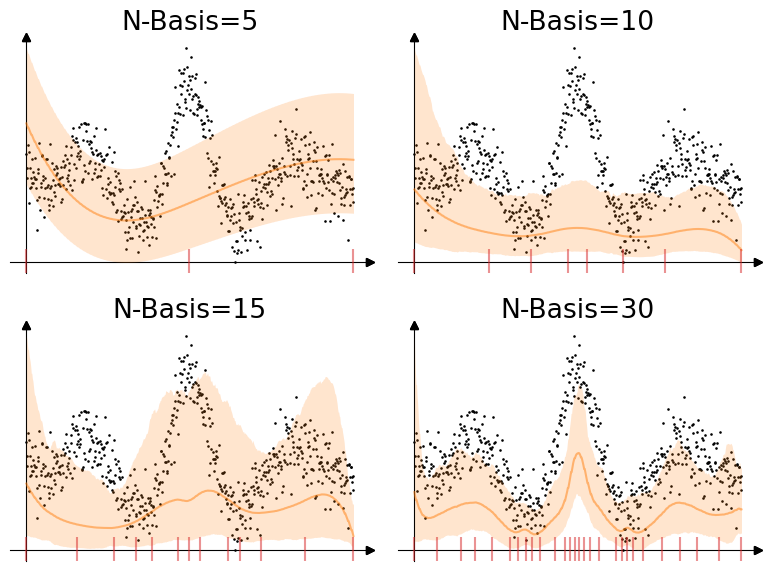

In [19]:
fig = make_mcmc_plots(mcmc_objs_non_equal_knots)